In [4]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [5]:
# library for train test split
from sklearn.model_selection import train_test_split

In [6]:
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [8]:
df = pd.read_csv("spam.txt", sep ='\t',names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
duplicates = df[df.duplicated()]
print(duplicates[:15])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls
339   ham                             Sorry, I'll call later
357  spam  Congratulations ur awarded 500 of CD vouchers ...
444   ham                             Sorry, I'll call later
533   ham                  Gudnite....tc...practice going on
655   ham                       Did u got that persons story
658   ham               You will be in the place of that man
702   ham                             Sorry, I'll call later
768   ham                             Sorry, I'll call later
769   ham  I cant pick the phone right now. Pls send a me...
775   ham                         Just sleeping..and surfing


In [11]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

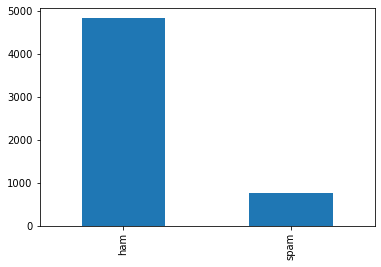

In [96]:
df.label.value_counts().plot.bar();

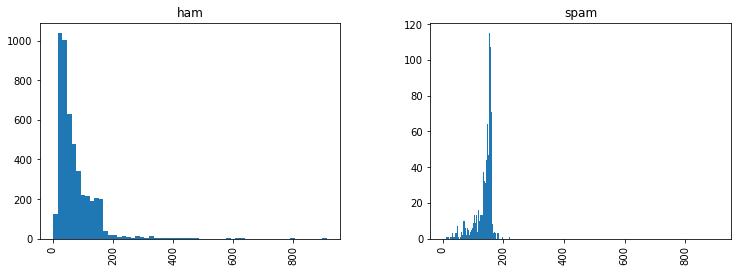

In [98]:
df['length'] = df['message'].apply(len)
df.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [12]:
ham_sms = df[df.label =='ham']
spam_sms = df[df.label=='spam']

In [13]:
#Visualize using wordcloud
ham_sms_word = " ".join(ham_sms.message.to_numpy().tolist())
spam_sms_word = " ".join(spam_sms.message.to_numpy().tolist())

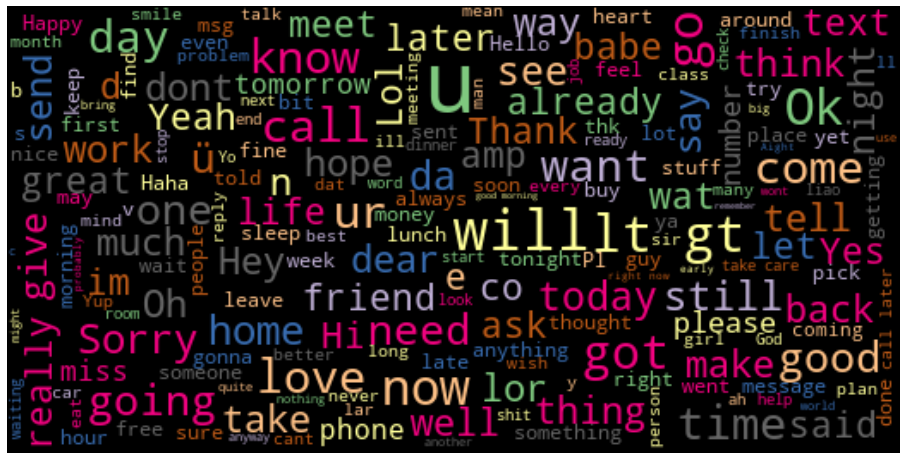

In [14]:
ham_wordcloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="Black", colormap='Accent').generate(ham_sms_word)
plt.figure(figsize=(16,10))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

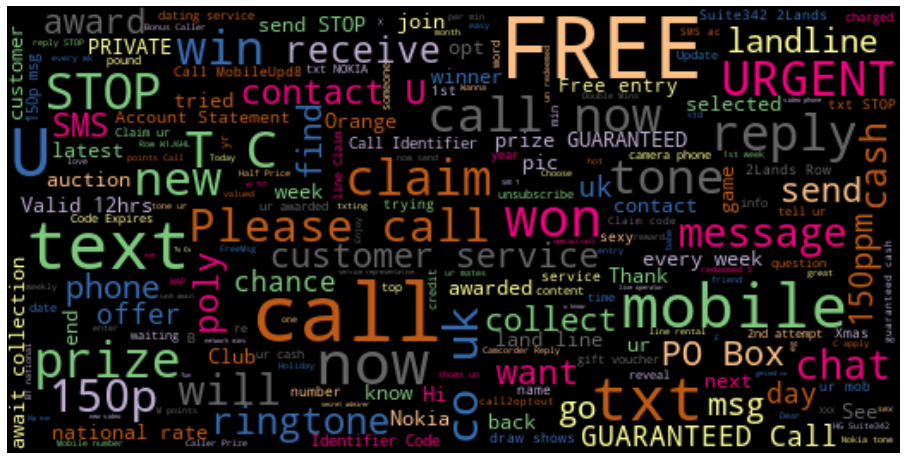

In [43]:
# wordcloud of spam messages
spam_wordcloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Accent_r').generate(spam_sms_word)
plt.figure(figsize=(16,10))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

C:\Users\Radhika Roger\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


15.481865284974095

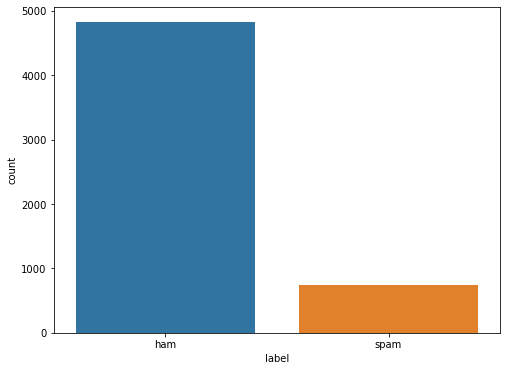

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(df.label)
(len(spam_sms)/len(ham_sms))*100 # 15.48%

In [18]:
ham_sms_data = ham_sms.sample(n = len(spam_sms), random_state = 44)
spam_sms_data = spam_sms
print(ham_sms_data.shape, spam_sms_data.shape)

(747, 2) (747, 2)


C:\Users\RADHIK~1\AppData\Local\Temp/ipykernel_752/1812785305.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sms_data = ham_sms_data.append(spam_sms_data).reset_index(drop=True)
C:\Users\Radhika Roger\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'sms types')

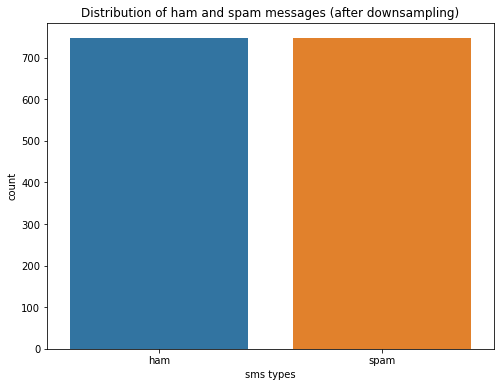

In [23]:
sms_data = ham_sms_data.append(spam_sms_data).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(sms_data.label)
plt.title('Distribution of ham and spam messages (after downsampling)')
plt.xlabel('sms types')

In [24]:
sms_data['text_length'] = sms_data['message'].apply(len)
labels = sms_data.groupby('label').mean()
labels

,text_length
label,
ham,73.238286
spam,138.670683


In [25]:
sms_data['sms_type']= sms_data['label'].map({'ham': 0, 'spam': 1})
sms_label = sms_data['sms_type'].values

In [27]:
# Split data into train and test
train_sms, test_sms, train_label, test_label = train_test_split(sms_data['message'], sms_label, test_size=0.2, random_state=434)

In [29]:
max_len = 50 
trunc_type = "post" 
pad_type = "post" 
oov_tok = "<OOV>" 
voc_size = 500

In [30]:
tknizer = Tokenizer(num_words = voc_size, char_level=False, oov_token = oov_tok)
tknizer.fit_on_texts(train_sms)

In [32]:
word_index = tknizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 

In [34]:
total_words = len(word_index)
print('%s unique tokens in training data. ' % total_words)

4169 unique tokens in training data. 


In [35]:
train_seq = tknizer.texts_to_sequences(train_sms)
train_pad = pad_sequences (train_seq, maxlen = max_len, padding = pad_type, truncating = trunc_type )
test_seq = tknizer.texts_to_sequences(test_sms)
test_pad = pad_sequences(test_seq, maxlen = max_len,
padding = pad_type, truncating = trunc_type)

In [36]:
print('Shape of training tensor: ', train_pad.shape)
print('Shape of testing tensor: ', test_pad.shape)

Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [37]:
len(train_seq[0]), len(train_seq[1])

(27, 24)

In [38]:
len(train_pad[0]), len(train_pad[1])

(50, 50)

In [39]:
print(train_pad[0])

[  1  47 186   9  34   1   3  24   1   2 274   2   7 152 275 135  34  10
  15   6   7  34 274  85  15  17   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [40]:
voc_size = 500 
emb_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [42]:
#Dense model architecture
dense_model = Sequential()
dense_model.add(Embedding(voc_size, emb_dim, input_length=max_len))
dense_model.add(GlobalAveragePooling1D())
dense_model.add(Dense(24, activation='relu'))
dense_model.add(Dropout(drop_value))
dense_model.add(Dense(1, activation='sigmoid'))

In [43]:
dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [44]:
dense_model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [46]:
num_epochs = 30
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = dense_model.fit(train_pad, train_label, epochs=num_epochs, validation_data=(test_pad, test_label),callbacks =[early_stopping], verbose=2)

Epoch 1/30
38/38 - 1s - loss: 0.6910 - accuracy: 0.5598 - val_loss: 0.6864 - val_accuracy: 0.7124
Epoch 2/30
38/38 - 0s - loss: 0.6757 - accuracy: 0.7833 - val_loss: 0.6678 - val_accuracy: 0.7926
Epoch 3/30
38/38 - 0s - loss: 0.6442 - accuracy: 0.8377 - val_loss: 0.6257 - val_accuracy: 0.8227
Epoch 4/30
38/38 - 0s - loss: 0.5766 - accuracy: 0.8669 - val_loss: 0.5451 - val_accuracy: 0.8562
Epoch 5/30
38/38 - 0s - loss: 0.4776 - accuracy: 0.8929 - val_loss: 0.4413 - val_accuracy: 0.8629
Epoch 6/30
38/38 - 0s - loss: 0.3706 - accuracy: 0.8987 - val_loss: 0.3478 - val_accuracy: 0.8863
Epoch 7/30
38/38 - 0s - loss: 0.2919 - accuracy: 0.9121 - val_loss: 0.2861 - val_accuracy: 0.8930
Epoch 8/30
38/38 - 0s - loss: 0.2323 - accuracy: 0.9272 - val_loss: 0.2461 - val_accuracy: 0.8963
Epoch 9/30
38/38 - 0s - loss: 0.1988 - accuracy: 0.9397 - val_loss: 0.2174 - val_accuracy: 0.9030
Epoch 10/30
38/38 - 0s - loss: 0.1726 - accuracy: 0.9439 - val_loss: 0.1933 - val_accuracy: 0.9130
Epoch 11/30
38/38 -

In [47]:
dense_model.evaluate(test_pad, test_label)

10/10 [==============================] - 0s 676us/step - loss: 0.1132 - accuracy: 0.9465


[0.11318477243185043, 0.9464883208274841]

In [51]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

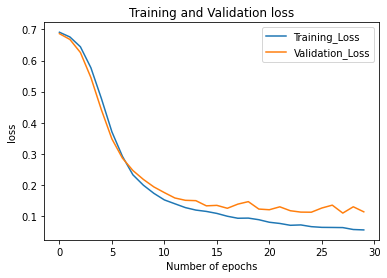

In [52]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

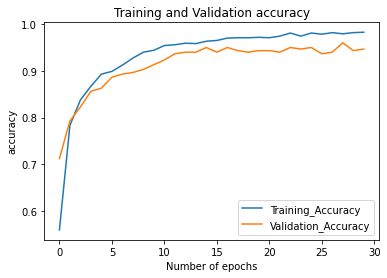

In [53]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [54]:
n_lstm = 20
drop_lstm =0.2

In [57]:
#LSTM Spam detection architecture
lstm_model = Sequential()
lstm_model.add(Embedding(voc_size, emb_dim, input_length=max_len))
lstm_model.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm_model.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm_model.add(Dense(1, activation='sigmoid'))

In [58]:
lstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [60]:
num_epochs = 30
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = lstm_model.fit(train_pad, train_label, epochs=num_epochs, validation_data=(test_pad, test_label),callbacks =[early_stopping], verbose=2)

Epoch 1/30
38/38 - 5s - loss: 0.6635 - accuracy: 0.6215 - val_loss: 0.5721 - val_accuracy: 0.6860
Epoch 2/30
38/38 - 1s - loss: 0.4171 - accuracy: 0.8350 - val_loss: 0.4157 - val_accuracy: 0.8528
Epoch 3/30
38/38 - 1s - loss: 0.2953 - accuracy: 0.9082 - val_loss: 0.3317 - val_accuracy: 0.8949
Epoch 4/30
38/38 - 1s - loss: 0.2444 - accuracy: 0.9252 - val_loss: 0.3124 - val_accuracy: 0.9047
Epoch 5/30
38/38 - 1s - loss: 0.2099 - accuracy: 0.9349 - val_loss: 0.2529 - val_accuracy: 0.9270
Epoch 6/30
38/38 - 1s - loss: 0.1971 - accuracy: 0.9379 - val_loss: 0.2463 - val_accuracy: 0.9302
Epoch 7/30
38/38 - 1s - loss: 0.1804 - accuracy: 0.9447 - val_loss: 0.2366 - val_accuracy: 0.9284
Epoch 8/30
38/38 - 1s - loss: 0.1622 - accuracy: 0.9482 - val_loss: 0.2387 - val_accuracy: 0.9320
Epoch 9/30
38/38 - 1s - loss: 0.1470 - accuracy: 0.9529 - val_loss: 0.2466 - val_accuracy: 0.9294


In [62]:
# Biderectional LSTM
Bilstm_model = Sequential()
Bilstm_model.add(Embedding(voc_size, emb_dim, input_length=max_len))
Bilstm_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
Bilstm_model.add(Dense(1, activation='sigmoid'))

In [63]:
Bilstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

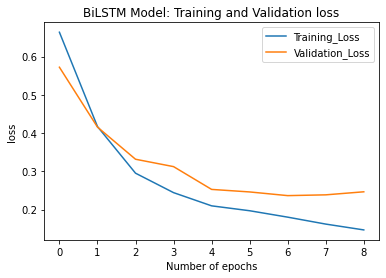

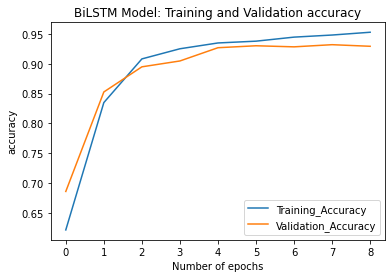

In [64]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [66]:
print(f"Dense architecture loss and accuracy: {dense_model.evaluate(test_pad, test_label)} " )
print(f"LSTM architecture loss and accuracy: {lstm_model.evaluate(test_pad, test_label)} " )
print(f"Bi-LSTM architecture loss and accuracy: {Bilstm_model.evaluate(test_pad, test_label)} " )

10/10 [==============================] - 0s 667us/step - loss: 0.1132 - accuracy: 0.9465
Dense architecture loss and accuracy: [0.11318477243185043, 0.9464883208274841] 
10/10 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.9294
LSTM architecture loss and accuracy: [0.24663574993610382, 0.9293644428253174] 
10/10 [==============================] - 1s 4ms/step - loss: 0.6891 - accuracy: 0.5543
Bi-LSTM architecture loss and accuracy: [0.6891114115715027, 0.554314374923706] 


In [68]:
# display long string 
pd.options.display.max_colwidth=100
df[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...


In [101]:
predict_sms_ham_spam = ['Sorry, I’ll call later']

In [102]:
def predict_spam(predict_sms_ham_spam):
    new_seq = tknizer.texts_to_sequences(predict_sms_ham_spam)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = pad_type,
                      truncating=trunc_type)
    return (dense_model.predict(padded))
predict_spam(predict_sms_ham_spam)

array([[0.0255329]], dtype=float32)

In [103]:
final = predict_spam(predict_sms_ham_spam)
def spam_or_ham(final):
    for message in final:
        if message>=0.7:
            print("SPAM")
        else:
            print("NOT SPAM")
        message = message+1
spam_or_ham(final)

NOT SPAM
